In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Data:
file = ('attacks.csv')

df = pd.read_csv(file, encoding='cp1252')
df

df1 = df.drop(columns=['Case Number', 'Date', 'Year', 'Country', 'Area', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23', 'Time', 'Injury', 'Name', 'Sex ', 'Location'])

#Renaming columns
df1 = df1.rename(columns={'Fatal (Y/N)':'Fatal', 'Species ': 'Species'})
df1



In [50]:
def unique(column):
    print(f'Unique values in this column are:\n {column.unique()}\n')


# Function to sort unique values in alphabetical order
def edges(column):
    try:
      print(f'Sorting unique values in this column:\n {column.sort_values().unique()}\n')
    except ValueError as error:
      print(f"Couldn't sort order because of: {error}\n")


# Function to cast all values into this type
def casting(column, dtype): 
    try:
      column.astype(dtype)
      print(f"Casting values into '{dtype}' is successful\n")
    except ValueError as error:
      print(f"Couldn't cast values into '{dtype}': {error}\n")


# Function to count the amount of unique values
def count_missing_values(column):
    print('Counting values in this column:')
    display(column.value_counts())
    print('*' * 160)


# Function to find (non-default) missing values
# 4  strategies are applied when searching for missing values
def find_non_default_values(column_name, dtype):
  column = df1[column_name]

  print(f'Missing value analysis on column: {column_name}\n')
  unique(column)
  edges(column)
  casting(column, dtype)
  count_missing_values(column)

In [ ]:
#Apply functions to find non_default_values:
find_non_default_values('Type', 'str')
find_non_default_values('Activity', 'str')
find_non_default_values('Age', 'float')
find_non_default_values('Fatal', 'str')
find_non_default_values('Species', 'str')

In [53]:
#Cleaning data values

# Drop rows where all data values are missing from the dataset  
df1 = df1.dropna(how='all')

#Removed whitespaces in dataset by applying 'skipinitialspace=True' while importing data
#https://stackoverflow.com/questions/43332057/pandas-strip-white-space


###REPLACING###
#function to replace non-default missing values with default missing values
def replace(df, column_name, old_value, new_value):
  column = df[column_name]
  df[column_name] = column.replace({old_value:new_value})


#Replacing values in column 'Type'
#Replacing typo 'Boatomg' and 'Boat' to 'Boating
#NaN is replaced by None 
replace(df1, 'Type', 'Boatomg', 'Boating') #--> 'Boatomg' is replaced by 'Boating'
replace(df1,'Type', 'Boat', 'Boating')    #--> 'Boat' is replaced by 'Boating'
replace(df1,'Type', np.nan, None)    #--> 'NaN' is replaced by None



#Replacing values in column 'Activity'
#NaN is replaced by None 
replace(df1, 'Activity', '.', None)  # --> . replaced by None
replace(df1, 'Activity', np.nan, None)


#Replacing values in column 'Species'
replace(df1, 'Species', np.nan, None)
replace(df1, 'Species', ' ', None)


#Replacing values in column 'Fatal'
#Dealing with different values
df2 = df1.replace({'Fatal': {
    'N': False,
    'Y':True,
    'M': False,
    'UNKNOWN': False,
    '2017': False,
    ' N': False,
    'N ': False,
    'y': True,
    np.nan: False,
    " ": False}})


#Show new dataset with adjusted default values
#Using this dataset to answer the questions
df2


<ipython-input-53-bfabc331f826>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = column.replace({old_value:new_value})


,Type,Activity,Age,Fatal,Species
0,Boating,Paddling,57,False,White shark
1,Unprovoked,Standing,11,False,None
2,Invalid,Surfing,48,False,None
3,Unprovoked,Surfing,NaN,False,2 m shark
4,Provoked,Free diving,NaN,False,"Tiger shark, 3m"
...,...,...,...,...,...
6297,Unprovoked,Diving,NaN,True,None
6298,Unprovoked,Pearl diving,NaN,True,None
6299,Unprovoked,Swimming,NaN,True,None
6300,Unprovoked,None,NaN,True,None


In [54]:
new_df = df2.copy()

# Drop empty cells in column 'Species'
new_df.dropna(subset=['Species'], inplace=True)

# Make values in lowercase for column 'Species'
# Make it easier to find variables and adjusting data values
new_df['Species'] = new_df['Species'].str.lower()

#our working dataset with confirmed shark attacks by witnesses
new_df 


#Function to determine top xx from a column
def top(df, column_name, number):
  return df[column_name].value_counts().head(number)

#Function to drop empty values
def drop_empty_values(df, column_name):
    df = df.dropna(subset=column_name, inplace=True)

# Question 1. What is the most dangerous types of sharks to humans?

In [56]:
# What are the most dangerous type of sharks
df1_q1 = new_df.copy()

# Select top 10 variables in column 'Species'
top(df1_q1, 'Species', 10)

white shark                                           164
shark involvement prior to death was not confirmed    105
invalid                                               102
shark involvement not confirmed                        89
tiger shark                                            73
shark involvement prior to death unconfirmed           68
bull shark                                             55
6' shark                                               40
4' shark                                               40
questionable incident                                  38
Name: Species, dtype: int64

In [57]:
shark_not_involved = df1_q1['Species'].str.contains('Involvement')
white_shark = df1_q1['Species'].str.contains('White')
tiger_shark = df1_q1['Species'].str.contains('Tiger')
bull_shark = df1_q1['Species'].str.contains('Bull')
invalid = df1_q1['Species'].str.contains('Invalid')

df1_q1['Species'] = np.where(shark_not_involved, 'no shark involvement', 
                          np.where(white_shark, 'white shark',
                                   np.where(tiger_shark, 'tiger shark', 
                                            np.where(bull_shark, 'bull shark', 
                                                     np.where(invalid, None, df1_q1['Species'])))))

#Dataset where similar variables are grouped together
df1_q1

,Type,Activity,Age,Fatal,Species
0,Boating,Paddling,57,False,white shark
3,Unprovoked,Surfing,NaN,False,2 m shark
4,Provoked,Free diving,NaN,False,"tiger shark, 3m"
6,Unprovoked,Swimming,18,True,tiger shark
7,Unprovoked,Fishing,52,False,"lemon shark, 3'"
...,...,...,...,...,...
6276,Unprovoked,Standing,16,True,12' tiger shark
6293,Unprovoked,Fishing,NaN,True,blue pointer
6294,Unprovoked,Fishing,NaN,True,blue pointer
6295,Unprovoked,Fishing,NaN,True,blue pointers


In [ ]:
replace(df1_q1, 'Species', 'no shark involvement', None)
drop_empty_values(df1_q1, ['Species'])

is_fatal = df1_q1.loc[df1_q1.Fatal == True]
is_fatal

Text(0.5, 1.0, 'Fatal Shark attacks')

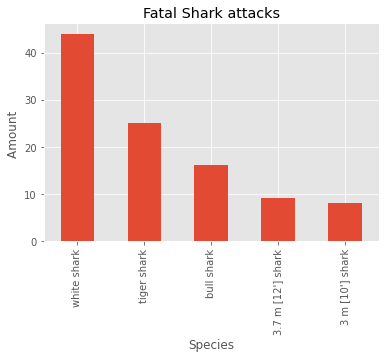

In [62]:
is_fatal['Species'].value_counts().head(5).plot(kind='bar')

plt.xlabel('Species')
plt.ylabel('Amount ')
plt.grid(True, axis='y')
plt.title('Fatal Shark attacks')

The most dangerous sharks are The white Sharks. Keep in mind that this assumpsing is based on this data set. Most of the data was dit not specified species which made it difficult to specify. 

# Question 2.  Are children more likely to be attacked by sharks?

In [ ]:
df1_q2 = df1_q1.copy()
replace(df1_q2, 'Species', 'no shark involvement', None)


df1_q2['Age'] = pd.to_numeric(df1_q2['Age'], errors='coerce')
df1_q2

In [ ]:
drop_empty_values(df1_q2, ['Age', 'Species'])
df1_q2

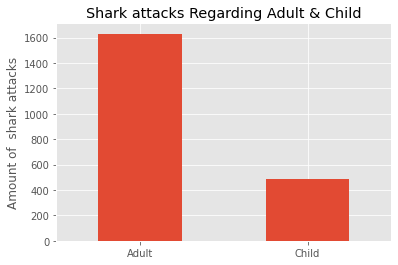

In [70]:
df1_q2['Age_group'] = df1_q2.loc[:, 'Age'] < 18


"""
Then we replace the boolean values in the column 'Age group' with child and adult. 
By plotting the results it shows that children aren't more likely to be attacked by sharks. 
488 childrens were attacked by sharks, whereas 1631 were adult
"""

#replace boolean values with 'Child' when < 18 yrs and 'Adult' when > 18 yrs
df1_q2['Age_group'] = df1_q2['Age_group'].replace({False: 'Adult', True:'Child'})

#plotting a barchart
df1_q2['Age_group'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('Amount of  shark attacks')
plt.title('Shark attacks Regarding Adult & Child')
plt.show()

According to the data adults are more likely to be attacked than childeren. A reason is that the activities of adults are more easeliy provoking the sharks. Because the the activities of the adults will probably part take is the deeper part of the ocean. 


#Question 3.  Are shark attacks where sharks were provoked more or less dangerous?

In [ ]:
df1_q3 = df1_q1.copy()
df1_q3

In [121]:
is_provoked = df1_q3.loc[df1_q3.Type == 'Provoked']
is_provoked


,Type,Activity,Age,Fatal,Species
4,Provoked,Free diving,NaN,False,"tiger shark, 3m"
10,Provoked,Feeding sharks,32,False,grey reef shark
14,Provoked,Feeding sharks,34,False,"tawny nurse shark, 2m"
55,Provoked,Fishing / Wading,24,False,juvenile nurse shark
104,Provoked,Fishing,34,False,4' shark
...,...,...,...,...,...
5939,Provoked,Dragging a shark,NaN,False,1.5 m shark
6131,Provoked,Standing on landed shark's tail,NaN,True,12' shark
6224,Provoked,Attempting to drive shark from area,NaN,False,a large hammerhead shark
6226,Provoked,Skin diving. Grabbed shark's tail; shark turne...,19,False,"nurse shark, 2.1 m [7']"


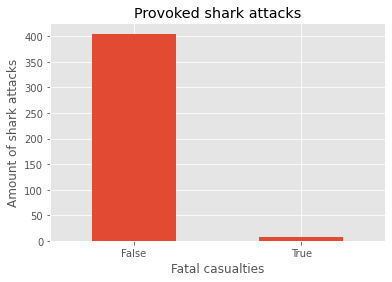

In [122]:
is_provoked['Fatal'].value_counts().plot(kind='bar')
plt.title('Provoked shark attacks')
plt.xticks(rotation=0)
plt.xlabel('Fatal casualties')
plt.ylabel('Amount of shark attacks')
plt.show()

In [ ]:
unprovoked =  df1_q3.loc[df1_q3.Type == 'Unprovoked']
unprovoked

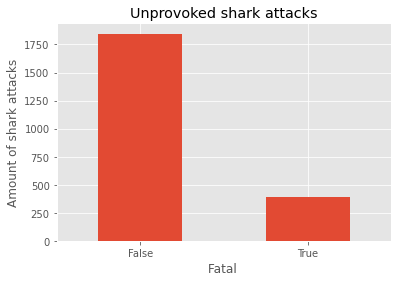

In [118]:
unprovoked['Fatal'].value_counts().plot(kind='bar')
plt.title('Unprovoked shark attacks')
plt.xticks(rotation=0)
plt.xlabel('Fatal ')
plt.ylabel('Amount of shark attacks')
plt.show()

As you can see there is no clear indication that unprovoked attacks are more dangerous.  As stated in the website https://petpedia.co/shark-attack-statistics/. Most attacks are just sharks exploring their territory or mistaking a human for one of the species they like to eat. So its not on if its provoked or not. Is more the curiosity of the shark that ends up in a attack than the involvement of the human. 

# Question 4. Are certain activities more likely to result in a shark attack?

In [107]:
df1_q4 = df1_q1.copy()

# Remove all empty data values from column 'Activity' and 'Species'
replace(df1_q4, 'Species', 'no shark involvement', None)
drop_empty_values(df1_q4, ['Activity', 'Species'])

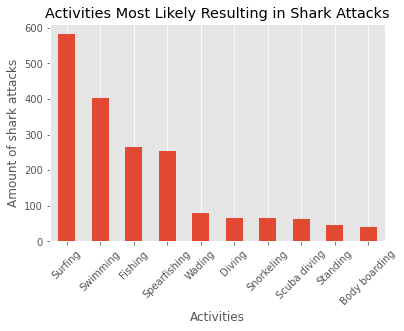

In [123]:
top_10_activities = top(df1_q4, 'Activity', 10)

top_10_activities.plot(kind='bar')

plt.title('Activities Most Likely Resulting in Shark Attacks')
plt.xlabel('Activities')
plt.ylabel('Amount of shark attacks')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Based on this data set the most accuring activities that result in a shark attack, are Surfing and Swimming. 

Conclusion is. Respect the ocean.